In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import tifffile
from matplotlib.patches import Patch

from pycodex.segmentation import extract_cell_features

sys.path.append("..")
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


/home/miniconda3/envs/valis/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
non_rigid_dst_dapi_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/999_test/registered_non_rigid/ometiff/dst_reg014_cyc002_ch001_Ch1Cy2.ome.tiff"
non_rigid_src_dapi_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/999_test/registered_non_rigid/ometiff/src_reg008_cyc001_ch001_Ch1Cy1.ome.tiff"
non_rigid_src_cd3e_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/999_test/registered_non_rigid/ometiff/src_reg008_cyc002_ch003_CD3e.ome.tiff"

rigid_dst_dapi_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/999_test/registered_rigid/ometiff/dst_reg014_cyc002_ch001_Ch1Cy2.ome.tiff"
rigid_src_dapi_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/999_test/registered_rigid/ometiff/src_reg008_cyc001_ch001_Ch1Cy1.ome.tiff"
rigid_src_cd3e_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/999_test/registered_rigid/ometiff/src_reg008_cyc002_ch003_CD3e.ome.tiff"

sift_dst_dapi_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/01_alignment/TMA544_run1=reg014_run2=reg008/run1/reg014_cyc002_ch001_Ch1Cy2.tiff"
sift_src_dapi_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/01_alignment/TMA544_run1=reg014_run2=reg008/run2/reg008_cyc001_ch001_Ch1Cy1.tiff"
sift_src_cde3_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/01_alignment/TMA544_run1=reg014_run2=reg008/run2/reg008_cyc002_ch003_CD3e.tiff"

non_rigid_dst_dapi = tifffile.imread(non_rigid_dst_dapi_f)
non_rigid_src_dapi = tifffile.imread(non_rigid_src_dapi_f)
non_rigid_src_cd3e = tifffile.imread(non_rigid_src_cd3e_f)

rigid_dst_dapi = tifffile.imread(rigid_dst_dapi_f)
rigid_src_dapi = tifffile.imread(rigid_src_dapi_f)
rigid_src_cd3e = tifffile.imread(rigid_src_cd3e_f)

sift_dst_dapi = tifffile.imread(sift_dst_dapi_f)
sift_src_dapi = tifffile.imread(sift_src_dapi_f)
sift_src_cd3e = tifffile.imread(sift_src_cde3_f)


Text(0.5, 1.0, 'Valis Alignment (non-rigid)')

Text(0.5, 1.0, 'Valis Alignment (rigid)')

Text(0.5, 1.0, 'SIFT Alignment')

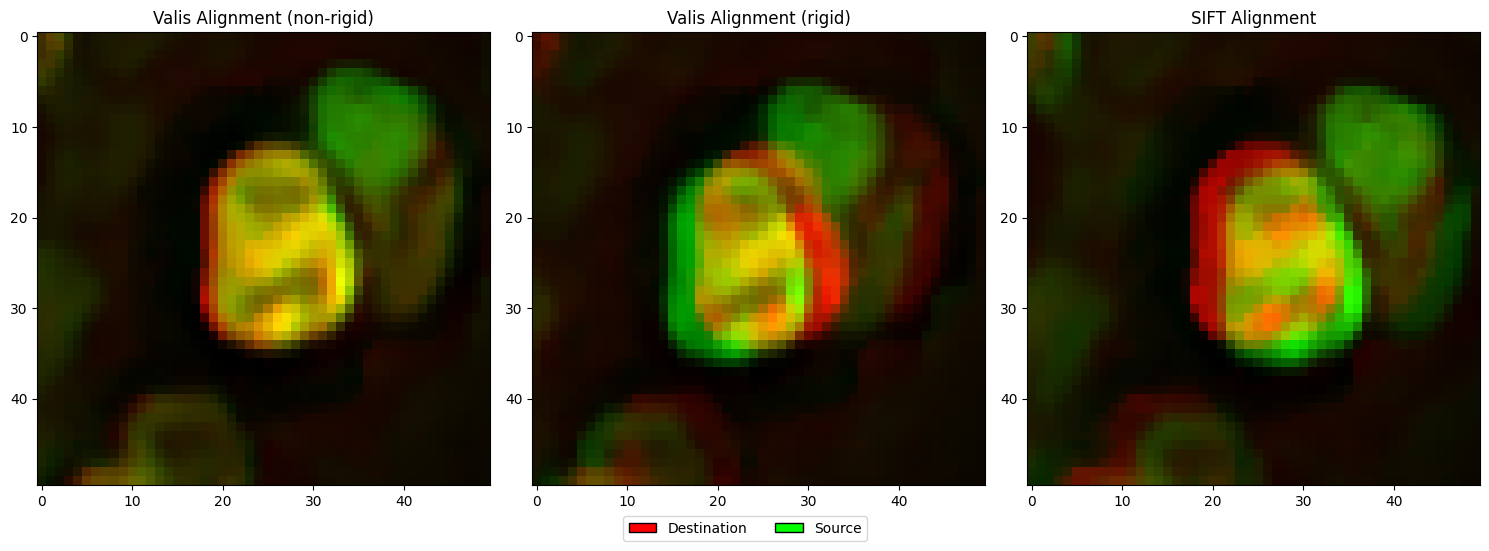

In [3]:
y_min = 5225
x_min = 1835
length = 50


def rgb_ndarray(img_dst, img_src, y_min, x_min, length):
    # Define the region of interest
    roi_dst = img_dst[y_min : (y_min + length), x_min : (x_min + length)]
    roi_src = img_src[y_min : (y_min + length), x_min : (x_min + length)]

    # Normalize the images to [0, 1] for visualization
    roi_dst_norm = roi_dst / roi_dst.max() if roi_dst.max() != 0 else roi_dst
    roi_src_norm = roi_src / roi_src.max() if roi_src.max() != 0 else roi_src

    # Create an RGB overlay
    overlay = np.zeros((*roi_dst.shape, 3))  # Initialize an RGB image
    overlay[..., 0] = roi_dst_norm  # Red channel for `DAPI_dst`
    overlay[..., 1] = roi_src_norm  # Green channel for `DAPI_src`

    return overlay


overlay_valis_non_rigid = rgb_ndarray(
    non_rigid_dst_dapi,
    non_rigid_src_dapi,
    y_min,
    x_min,
    length,
)
overlay_valis_rigid = rgb_ndarray(
    rigid_dst_dapi,
    rigid_src_dapi,
    y_min,
    x_min,
    length,
)
overlay_sift = rgb_ndarray(
    sift_dst_dapi,
    sift_src_dapi,
    y_min,
    x_min,
    length,
)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(overlay_valis_non_rigid)
axs[0].set_title("Valis Alignment (non-rigid)")
axs[1].imshow(overlay_valis_rigid)
axs[1].set_title("Valis Alignment (rigid)")
axs[2].imshow(overlay_sift)
axs[2].set_title("SIFT Alignment")

## Add color legend
legend_elements = [
    Patch(facecolor="#FF0000", label="Destination", edgecolor="black"),
    Patch(facecolor="#00FF00", label="Source", edgecolor="black"),
]
fig.legend(
    handles=legend_elements,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 0),
)

plt.tight_layout()


Text(0.5, 1.0, 'Valis Alignment (non-rigid)')

Text(0.5, 1.0, 'Valis Alignment (rigid)')

Text(0.5, 1.0, 'SIFT Alignment')

Text(0.5, 0.98, 'CellLabel = 26881, DAPI')

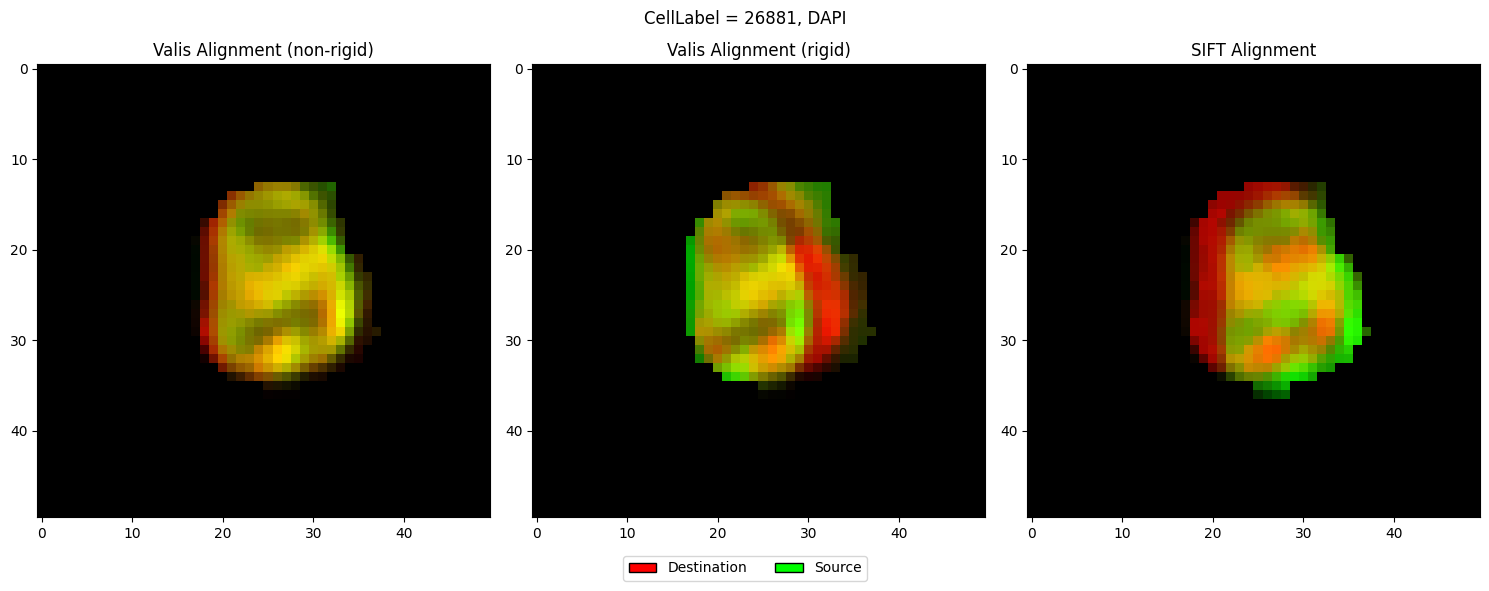

In [4]:
y_min = 5225
x_min = 1835
length = 50

mask_tiff_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/05_marker_ometiff/TMA544_run1=reg014_run2=reg008/20250103_run1/segmentation_mask.tiff"
mask = tifffile.imread(mask_tiff_f)
mask_sm = mask[y_min : y_min + length, x_min : x_min + length].copy()

mask_sm[mask_sm != 26881] = 0
mask_sm[mask_sm == 26881] = 1

mask_sm = np.stack([mask_sm] * 3, axis=-1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5.5))
axs[0].imshow(overlay_valis_non_rigid * mask_sm)
axs[0].set_title("Valis Alignment (non-rigid)")
axs[1].imshow(overlay_valis_rigid * mask_sm)
axs[1].set_title("Valis Alignment (rigid)")
axs[2].imshow(overlay_sift * mask_sm)
axs[2].set_title("SIFT Alignment")

## Add color legend
legend_elements = [
    Patch(facecolor="#FF0000", label="Destination", edgecolor="black"),
    Patch(facecolor="#00FF00", label="Source", edgecolor="black"),
]
fig.legend(
    handles=legend_elements,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 0),
)

fig.suptitle("CellLabel = 26881, DAPI", fontsize=12)


plt.tight_layout()


Text(0.5, 1.0, 'Valis Alignment (non-rigid)')

Text(0.5, 1.0, 'Valis Alignment (rigid)')

Text(0.5, 1.0, 'SIFT Alignment')

Text(0.5, 0.98, 'CellLabel = 26881, CD3e')

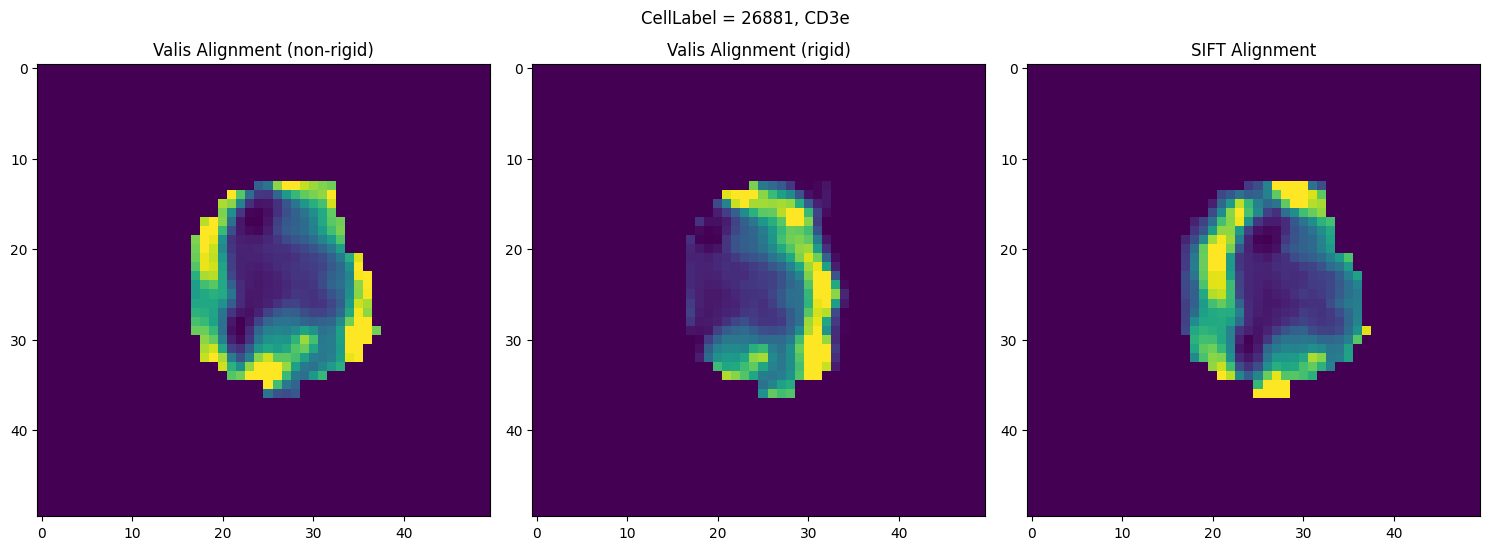

In [5]:
y_min = 5225
x_min = 1835
length = 50


mask_tiff_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/05_marker_ometiff/TMA544_run1=reg014_run2=reg008/20250103_run1/segmentation_mask.tiff"
mask = tifffile.imread(mask_tiff_f)
mask_sm = mask[y_min : y_min + length, x_min : x_min + length].copy()

mask_sm[mask_sm != 26881] = 0
mask_sm[mask_sm == 26881] = 1


def clip_99_percentile(im, y_min=y_min, x_min=x_min, length=length):
    im_clip = np.clip(im, 0, np.quantile(im, 0.99))
    return im_clip[y_min : y_min + length, x_min : x_min + length]


fig, axs = plt.subplots(1, 3, figsize=(15, 5.5))
axs[0].imshow(clip_99_percentile(non_rigid_src_cd3e) * mask_sm)
axs[0].set_title("Valis Alignment (non-rigid)")
axs[1].imshow(clip_99_percentile(rigid_src_cd3e) * mask_sm)
axs[1].set_title("Valis Alignment (rigid)")
axs[2].imshow(clip_99_percentile(sift_src_cd3e) * mask_sm)
axs[2].set_title("SIFT Alignment")

fig.suptitle("CellLabel = 26881, CD3e", fontsize=12)


plt.tight_layout()


In [6]:
non_rigid_src_cd3e

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [7]:
y_min = 5225
x_min = 1835
length = 50


mask_tiff_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/05_marker_ometiff/TMA544_run1=reg014_run2=reg008/20250103_run1/segmentation_mask.tiff"
mask = tifffile.imread(mask_tiff_f)
mask_sm = mask[y_min : y_min + length, x_min : x_min + length].copy()
mask_sm[mask_sm != 26881] = 0
mask_sm[mask_sm == 26881] = 1

non_rigid_src_cd3e_sm = non_rigid_src_cd3e[
    y_min : y_min + length, x_min : x_min + length
].copy()
rigid_src_cd3e_sm = rigid_src_cd3e[
    y_min : y_min + length, x_min : x_min + length
].copy()
sift_src_cd3e_sm = sift_src_cd3e[y_min : y_min + length, x_min : x_min + length].copy()

non_rigid_src_cd3e_signal = np.sum(non_rigid_src_cd3e_sm * mask_sm) / mask_sm.sum()
rigid_src_cd3e_signal = np.sum(rigid_src_cd3e_sm * mask_sm) / mask_sm.sum()
sift_src_cd3e_signal = np.sum(sift_src_cd3e_sm * mask_sm) / mask_sm.sum()

Text(0.5, 1.0, 'CD3e')

Text(0, 0.5, 'Signal Intensity')

Text(0.5, 0, 'Alignment Method')

Text(0.0, 11851.671052631578, '11,851')

Text(1.0, 9756.373684210526, '9,756')

Text(2.0, 10581.376315789474, '10,581')

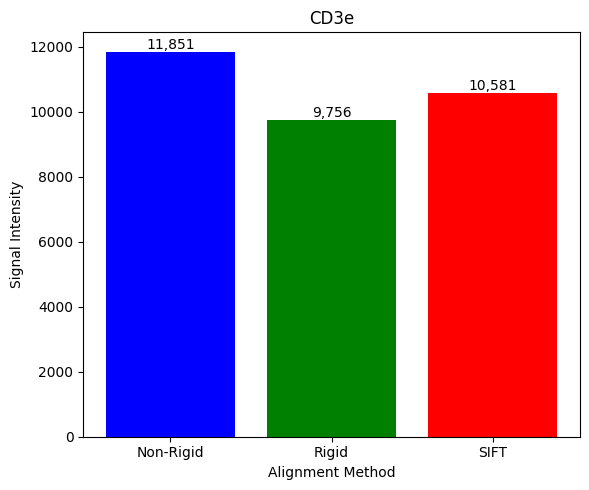

In [8]:
# Re-import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ["Non-Rigid", "Rigid", "SIFT"]
values = [non_rigid_src_cd3e_signal, rigid_src_cd3e_signal, sift_src_cd3e_signal]

# Create a bar chart
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(labels, values, color=["blue", "green", "red"])

# Add titles and labels
ax.set_title("CD3e", fontsize=12)
ax.set_ylabel("Signal Intensity")
ax.set_xlabel("Alignment Method")

# Add value annotations
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.show()


In [9]:
mask_tiff_f = "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/05_marker_ometiff/TMA544_run1=reg014_run2=reg008/20250103_run1/segmentation_mask.tiff"
mask = tifffile.imread(mask_tiff_f)

non_rigid_data, non_rigid_data_scale = extract_cell_features(
    {"DAPI": non_rigid_src_dapi, "CD3e": non_rigid_src_cd3e}, mask
)
rigid_data, rigid_data_scale = extract_cell_features(
    {"DAPI": rigid_src_dapi, "CD3e": rigid_src_cd3e}, mask
)
sift_data, sift_data_scale = extract_cell_features(
    {"DAPI": sift_src_dapi, "CD3e": sift_src_cd3e}, mask
)

data_dir = "/mnt/nfs/home/wenruiwu/pipeline/alignment/data/output/cell_feature/data"
non_rigid_data.to_csv(Path(data_dir) / "non_rigid.csv", index=False)
rigid_data.to_csv(Path(data_dir) / "rigid.csv", index=False)
sift_data.to_csv(Path(data_dir) / "sift.csv", index=False)

data_scale_dir = (
    "/mnt/nfs/home/wenruiwu/pipeline/alignment/data/output/cell_feature/data_scale"
)
non_rigid_data_scale.to_csv(Path(data_scale_dir) / "non_rigid.csv", index=False)
rigid_data_scale.to_csv(Path(data_scale_dir) / "rigid.csv", index=False)
sift_data_scale.to_csv(Path(data_scale_dir) / "sift.csv", index=False)


In [10]:
dapi_scale_df = (
    non_rigid_data_scale[["cellLabel", "DAPI"]]
    .rename(columns={"DAPI": "non_rigid"})
    .merge(
        rigid_data_scale[["cellLabel", "DAPI"]].rename(columns={"DAPI": "rigid"}),
        on="cellLabel",
    )
    .merge(
        sift_data_scale[["cellLabel", "DAPI"]].rename(columns={"DAPI": "sift"}),
        on="cellLabel",
    )
)
dapi_scale_df

,cellLabel,non_rigid,rigid,sift
0,1,0.000000,0.000000,0.000000
1,2,4359.807763,4059.685767,5367.157116
2,3,0.000000,0.000000,0.000000
3,4,11964.730942,8136.188341,12341.085202
4,5,28260.141914,28111.105611,31834.666667
...,...,...,...,...
27794,27795,10153.513514,3442.675676,8226.216216
27795,27796,9330.978378,20303.216216,27151.524324
27796,27797,13294.933333,3837.466667,2128.288889
27797,27798,11540.565217,9716.586957,12131.391304


(<Figure size 988.8x604.8 with 2 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7fe67fc6ab30>)

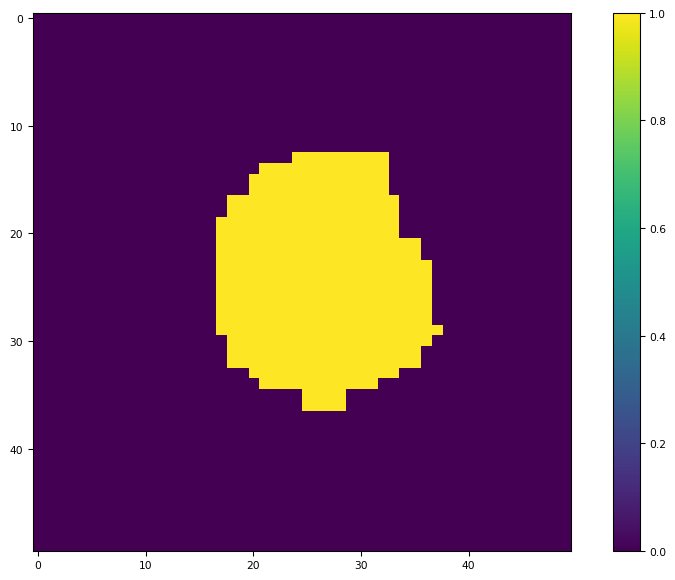

In [11]:
y_min = 5225
x_min = 1835
length = 50


tifffile.imshow(mask_sm)